# Glassdoor Data Science Jobs Data Analysis

<br>

# <font color='blue'>Introduction</font>

**The analysis type practiced in this notebook is descriptive analysis. It is at the foundation of all data insight. It is the simplest and most common use of data analysis methodologies in business today. Descriptive analysis answers the “what happened” by summarizing past/given data, usually in the form of dashboards.**

**EDA helps you discover relationships between measures in your data, which are not evidence for the existence of the correlation, as denoted by the phrase (Correlation doesn’t imply causation)**

>## EDA explores data to find relationships between measures that tells us they exist, without the cause. They can be used to formulate hypotheses.


# <font color='blue'>About Dataset</font>

**As a sophomore year in college, I am keenly looking for internship/job oppurtunities in data science domain and I have noticed that there are many like me. That is the reason I thought working on jobs dataset should give me both the practice required and knowledge to break into the field.<br><br>
Orginial Shape -<br><br>
Rows : 1000<br>
Columns : 14**

**This dataset contains data about some of the job advertisements in data science or related fields posted on Glassdoor, leading job hunting platform. It includes variables like Size of the company and its revenure and overlooked factors like Rating, Competitors, etc..**

**In this notebooks I have tried to find an insight on how variables other than skills affect a candidates's salary quote in data science domain and what should be the apllication strategy to maximise salary.**

## [Link to Dataset](https://www.kaggle.com/datasets/rkb0023/glassdoor-data-science-jobs)

# <font color='blue'>Data Preparation</font>

In [1]:
# Libraries Uded
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jovian

In [2]:
df = pd.read_csv('./glassdoor_jobs.csv')

# <font color='blue'>Data Cleaning</font>

####  (Note that all salary figures are in thousands)

In [3]:
# Hourly or Contract Based
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per' in x.lower() else 0)

# Analysing quoted salary range
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
minus_kd = salary.apply(lambda x: x.replace('K', '').replace('$',''))

min_hr = minus_kd.apply(lambda x: x.lower().replace('per hour', ''))

df['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary + df.max_salary) / 2

In [4]:
# company name text only
df['company_name'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-3], axis=1)

# Job in Headqaurters
df['job_in_HQ'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis=1)

# age of company
df['age'] = df['Founded'].apply(lambda x: x if x < 1 else 2022 - x)

### Parsing the Job Description posted in to identify ommon skills required by the employers. Others include Modellers, Advisors, Interns and other roles with relatively low frequency.

In [5]:
# python
df['python_reqd'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

# r studio
df['r_reqd'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r.studio' in x.lower() else 0)

# SQL
df['sql_reqd'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)

# Spark
df['spark_reqd'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

# aws
df['aws_reqd'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

# Excel 
df['excel_reqd'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [6]:
pd.set_option('display.max_columns',35)

### Classifying jobs into their respective Job Types

In [7]:
df['Type'] = df['Job Title'].apply(lambda x: 'Analyst' if 'analyst' in x.lower() 
                                     else ('Scientist' if 'scientist' in x.lower() 
                                           else ('Engineer' if 'engineer' in x.lower() else 'Other')))

### Summary Of Data

In [8]:
df.describe()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,job_in_HQ,age,python_reqd,r_reqd,sql_reqd,spark_reqd,aws_reqd,excel_reqd
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.581300,1650.801000,0.030000,83.040000,120.600000,101.820000,0.424000,33.191000,0.662000,0.003000,0.538000,0.238000,0.239000,0.411000
std,1.323818,741.158672,0.170673,26.101718,34.633213,29.383516,0.494438,44.763202,0.473265,0.054717,0.498803,0.426072,0.426686,0.492261
min,-1.000000,-1.000000,0.000000,17.000000,23.000000,20.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,1920.750000,0.000000,68.000000,101.000000,89.500000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,1995.000000,0.000000,83.000000,121.000000,99.500000,0.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.300000,2008.000000,0.000000,105.000000,138.000000,121.500000,1.000000,36.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,5.000000,2019.000000,1.000000,139.000000,229.000000,184.000000,1.000000,332.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
ad_for_scientist = df[df['Type']=='Scientist'].shape[0]

In [10]:
print('The number of ads posted for Data Scientists was {}'.format(ad_for_scientist))

The number of ads posted for Data Scientists was 759


### More than 75% of the ads were for Data Scientists. But this does not clarify anything, we will need to find out how job titles affect the salary quotation. <br> <br>First lets see what can we infer from data description above

>## Mean values of binary variables for Python, Sql and Excel are considerably higher than other mean values which means these make the most sought after skill set

## Does working at headquarters matter?

In [15]:
df.groupby('Type')[['avg_salary']].mean()

,avg_salary
Type,
Analyst,99.866667
Engineer,101.328829
Other,100.436364
Scientist,102.185112


In [12]:
df[df['job_in_HQ']==1].groupby('Type')[['avg_salary']].mean()

,avg_salary
Type,
Analyst,97.639535
Engineer,108.580357
Other,92.666667
Scientist,101.176174


### A corelation matrix can be used to identify the relation here

In [48]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,job_in_HQ,age,python_reqd,r_reqd,sql_reqd,spark_reqd,aws_reqd,excel_reqd
Rating,1.000000,0.390460,0.008688,-0.042775,-0.032203,-0.037977,0.116271,0.088425,-0.035982,0.002157,0.032533,0.049426,0.058958,0.032543
Founded,0.390460,1.000000,0.082156,-0.082834,-0.072586,-0.079568,0.167790,0.288295,-0.064102,0.024969,0.031490,0.085866,0.034845,0.054014
hourly,0.008688,0.082156,1.000000,-0.445174,-0.495849,-0.489945,0.050770,-0.031672,-0.072621,0.097541,-0.072195,-0.043223,0.038900,0.019897
min_salary,-0.042775,-0.082834,-0.445174,1.000000,0.869927,0.956831,-0.022102,0.032291,0.044367,-0.077180,0.017028,0.003374,-0.035463,-0.065241
max_salary,-0.032203,-0.072586,-0.495849,0.869927,1.000000,0.975714,-0.011422,0.031136,0.055074,-0.081769,0.026492,0.021314,-0.016691,-0.061509
avg_salary,-0.037977,-0.079568,-0.489945,0.956831,0.975714,1.000000,-0.016548,0.032692,0.052163,-0.082469,0.023176,0.014059,-0.025587,-0.065227
job_in_HQ,0.116271,0.167790,0.050770,-0.022102,-0.011422,-0.016548,1.000000,-0.049523,-0.024332,0.026936,0.032016,-0.037595,-0.025318,0.101732
age,0.088425,0.288295,-0.031672,0.032291,0.031136,0.032692,-0.049523,1.000000,-0.128921,0.000992,0.009067,-0.067729,0.050279,0.083700
python_reqd,-0.035982,-0.064102,-0.072621,0.044367,0.055074,0.052163,-0.024332,-0.128921,1.000000,0.000541,0.359767,0.290126,0.172415,-0.094880
r_reqd,0.002157,0.024969,0.097541,-0.077180,-0.081769,-0.082469,0.026936,0.000992,0.000541,1.000000,0.050833,-0.030657,-0.030741,0.028504


In [49]:
df.job_in_HQ.corr(df.avg_salary)

-0.016548406100429305

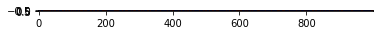

In [27]:
row = np.array(df.job_in_HQ)
plt.imshow(row[None, :], cmap=plt.cm.jet, interpolation='nearest');

> # A negative corelation value so close to Zero! This means that Headquarters have little to no variation on salary quotations.

In [51]:
df['Rating_Bins'] = pd.qcut(df['Rating'], q=5)

In [56]:
crosstable=pd.crosstab(df['Rating_Bins'],df['avg_salary'])
crosstable

avg_salary,20.0,56.5,57.0,68.5,69.5,75.5,80.0,84.5,89.5,91.0,91.5,92.0,93.5,94.5,96.5,97.0,99.5,100.5,109.0,110.5,111.0,119.0,121.5,124.0,124.5,127.5,130.0,130.5,140.5,184.0
Rating_Bins,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(-1.001, 3.3]",8,7,8,1,7,4,11,7,10,11,8,11,7,1,12,5,7,7,6,6,5,5,37,8,7,3,8,12,8,6
"(3.3, 3.6]",5,1,7,3,1,8,2,6,3,5,6,3,6,8,5,5,5,8,7,4,6,5,19,5,5,6,4,0,7,6
"(3.6, 4.0]",5,13,7,12,10,5,3,9,6,6,6,3,7,5,4,7,8,6,6,9,12,10,26,10,9,12,9,6,7,7
"(4.0, 4.4]",7,5,3,5,4,4,5,4,4,2,5,6,4,6,7,5,2,5,4,5,5,3,22,3,5,6,5,7,4,4
"(4.4, 5.0]",5,4,5,9,8,9,9,4,7,6,5,7,6,10,2,8,8,4,7,6,2,7,26,4,4,3,4,5,4,7


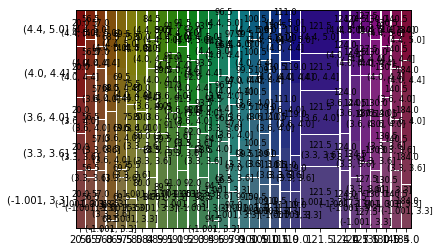

In [79]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data=df, index=['avg_salary', 'Rating_Bins'])
plt.show();

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

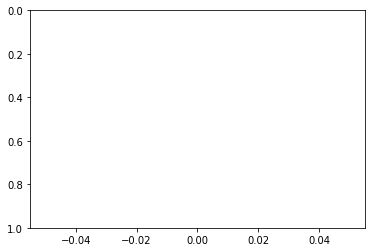

In [80]:
scatter = sns.scatterplot(x='avg_salary', y='Rating_Bins', data=df)
scatter.set_xlabel('Displacement')
scatter.set_ylabel('Highway')
scatter.set_title('Highway versus Displacement')
plt.show()

TypeError: Invalid object type at position 0

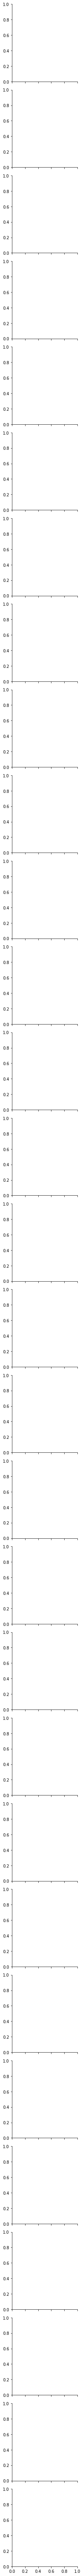

In [82]:
g = sns.FacetGrid(data=df, row='avg_salary')
g.map(sns.histplot, 'Rating_Bins', kde=False)